In [1]:
import darts
import torch
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt 
from pandas.plotting import autocorrelation_plot
from darts.timeseries import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries
from darts.utils.timeseries_generation import random_walk_timeseries
from darts.dataprocessing.transformers.scaler import Scaler
from darts.utils.statistics import plot_hist
from darts.utils.statistics import plot_residuals_analysis
# jupyter notebook settings
plt.style.use('seaborn')
warnings.filterwarnings("ignore")
np.random.seed(42)    # reproducibility
torch.manual_seed(42) # reproducibility
%matplotlib inline

/tmp/ipykernel_25463/1231804892.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Random Walk Time series

367


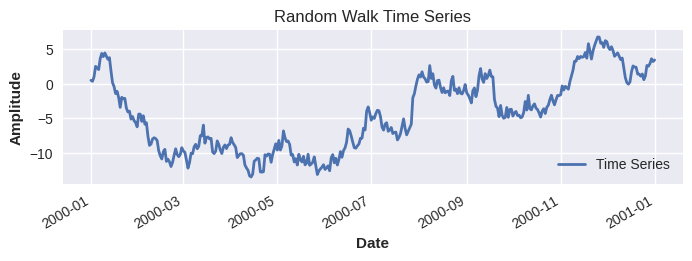

In [2]:
dataset = random_walk_timeseries(start = pd.Timestamp(year=2000, month=1, day=1),
                                 end   = pd.Timestamp(year=2001, month=1, day=1))
plt.figure(figsize=(8, 2))
dataset.plot(label='Time Series')
plt.title('Random Walk Time Series')
plt.ylabel('Amplitude')
plt.xlabel('Date')
plt.legend()
print(len(dataset))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

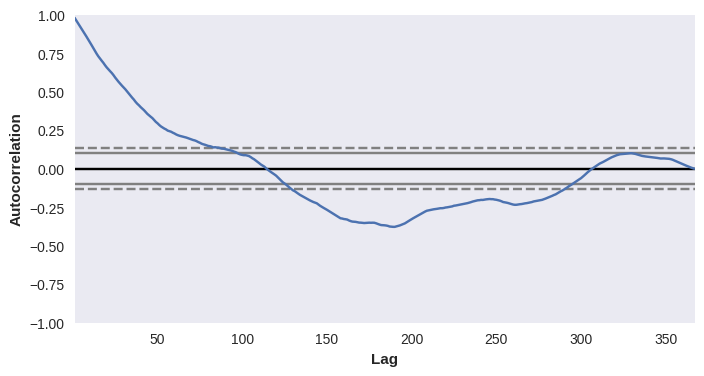

In [3]:
plt.figure(figsize=(8, 4))
autocorrelation_plot(dataset.pd_dataframe())

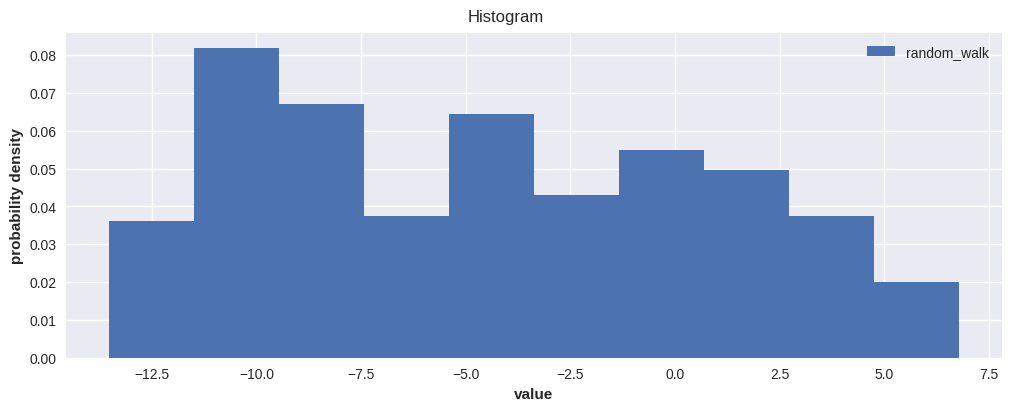

In [4]:
plot_hist(dataset, density=True, fig_size=(10,4))

In [5]:
# scaled time series
scaler = Scaler()
scaled_series = scaler.fit_transform(dataset.copy())

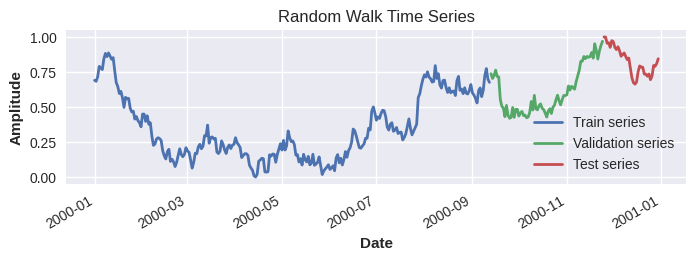

In [6]:
train_size = int(0.7 * len(scaled_series))
valid_size = int(0.2 * len(scaled_series))
test_size  = int(0.1 * len(scaled_series))

train = scaled_series[ : train_size]
val   = scaled_series[train_size : train_size + valid_size]
test  = scaled_series[train_size + valid_size : train_size + valid_size + test_size]

plt.figure(figsize=(8, 2))
train.plot(label='Train series')
val.plot(label='Validation series')
test.plot(label='Test series')
plt.title('Random Walk Time Series')
plt.ylabel('Amplitude')
plt.xlabel('Date')
plt.legend()